In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lokisilvres/dental-disease-panoramic-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/zhangqi/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6


0 /Users/zhangqi/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/COCO/COCO/train/3585150000-jpg_png_jpg.rf.45c5a7e150f53076399c33479c775ab8.jpg
Image shape: (640, 640, 3)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255
1 /Users/zhangqi/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/COCO/COCO/train/3832840000-jpg_png_jpg.rf.917a84a8314fc4b44f3ffec2be024915.jpg
Image shape: (840, 1615, 3)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255
2 /Users/zhangqi/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/COCO/COCO/train/9ca39105-MORTAJI_SAEIDEH_2020-06-16104607_jpg.rf.c7fed91c49456945ae346784f51b2e16.jpg
Image shape: (840, 1615, 3)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255
3 /Users/zhangqi/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/COCO/COCO/train/2777550000-jpg_p

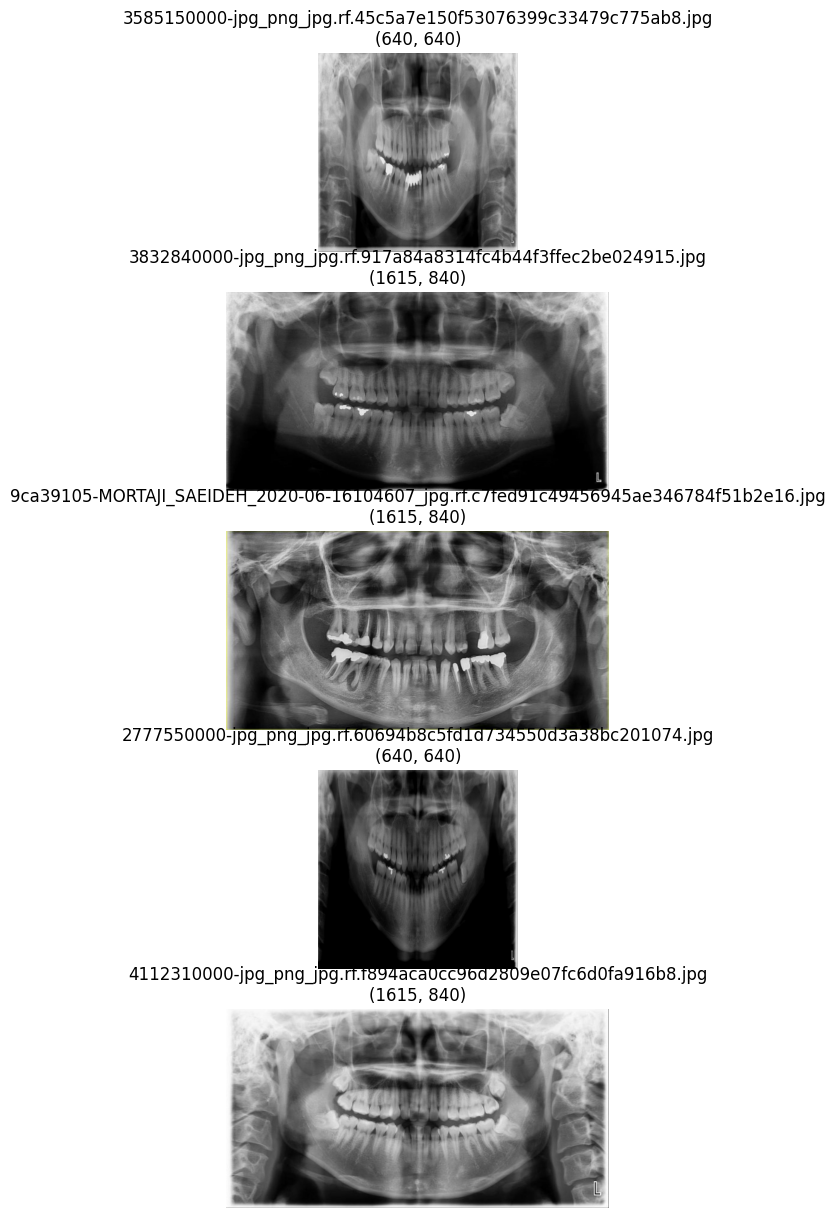

In [54]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

image_extensions = ['.jpg', '.jpeg', '.png', '.tiff', '.bmp']
image_count = 0
image_files = []

for root, dirs, files in os.walk(path+"/COCO/COCO/train"):
    for file in files:
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_count += 1
            if len(image_files) < 5:
                image_files.append(os.path.join(root, file))


plt.figure(figsize=(20, 15))
img = []

for i, img_file in enumerate(image_files):
    print(i, img_file)
    img.append(Image.open(os.path.join(root, img_file)))
    numpy_array_pil = np.array(img[i])

    print("Image shape:", numpy_array_pil.shape)
    print("Image data type:", numpy_array_pil.dtype)
    print("Min pixel value:", numpy_array_pil.min())
    print("Max pixel value:", numpy_array_pil.max())

    plt.subplot(5, 1, i+1)
    plt.imshow(img[i], cmap='gray' if img[i].mode == 'L' else None)
    plt.title(f"{os.path.basename(img_file)}\n{img[i].size}")
    plt.axis('off')

0 /Users/zhangqi/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/YOLO/YOLO/train/images/3585150000-jpg_png_jpg.rf.45c5a7e150f53076399c33479c775ab8.jpg
Image shape: (640, 640, 3)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255
1 /Users/zhangqi/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/YOLO/YOLO/train/images/3832840000-jpg_png_jpg.rf.917a84a8314fc4b44f3ffec2be024915.jpg
Image shape: (840, 1615, 3)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255
2 /Users/zhangqi/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/YOLO/YOLO/train/images/9ca39105-MORTAJI_SAEIDEH_2020-06-16104607_jpg.rf.c7fed91c49456945ae346784f51b2e16.jpg
Image shape: (840, 1615, 3)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255
3 /Users/zhangqi/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/YOLO/YOLO/t

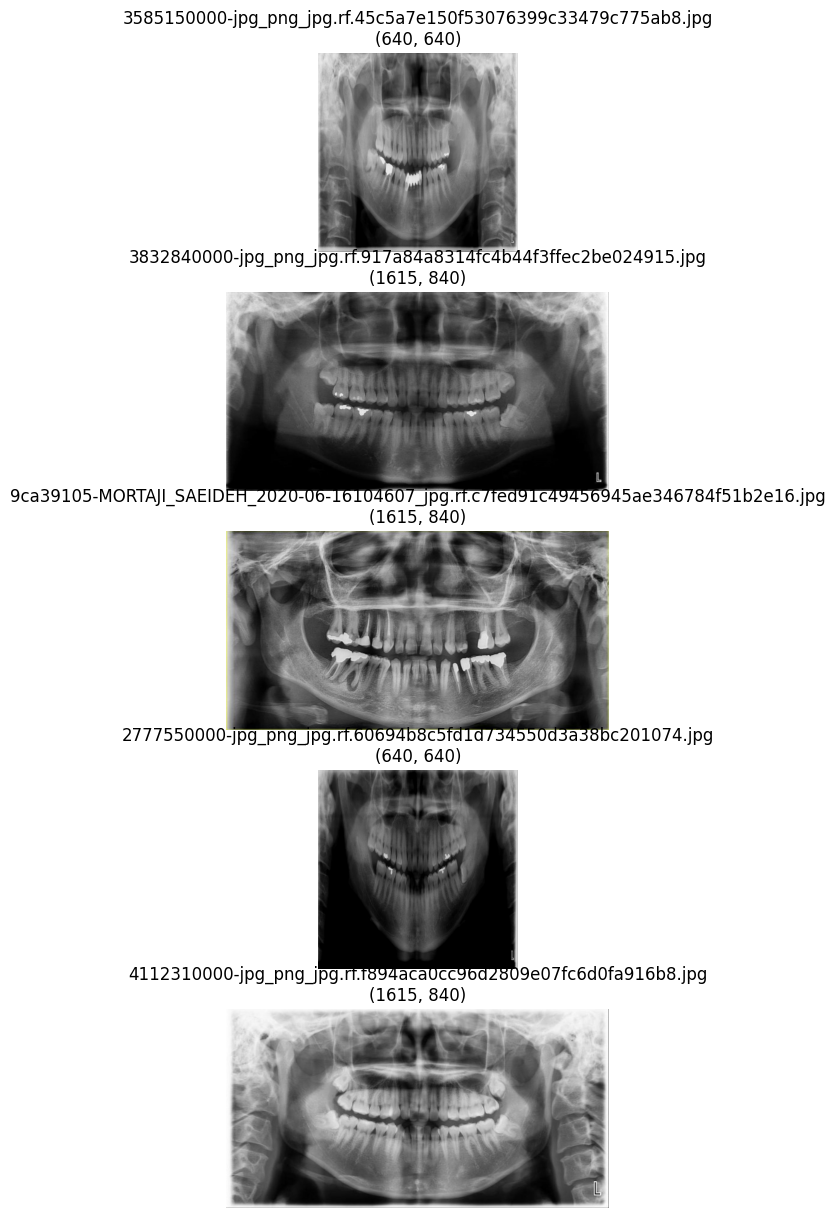

In [55]:
image_extensions = ['.jpg', '.jpeg', '.png', '.tiff', '.bmp']
image_count = 0
image_files = []

for root, dirs, files in os.walk(path+"/YOLO/YOLO/train/images"):
    for file in files:
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_count += 1
            if len(image_files) < 5:
                image_files.append(os.path.join(root, file))


plt.figure(figsize=(20, 15))
img = []

for i, img_file in enumerate(image_files):
    print(i, img_file)
    img.append(Image.open(os.path.join(root, img_file)))
    numpy_array_pil = np.array(img[i])

    print("Image shape:", numpy_array_pil.shape)
    print("Image data type:", numpy_array_pil.dtype)
    print("Min pixel value:", numpy_array_pil.min())
    print("Max pixel value:", numpy_array_pil.max())

    plt.subplot(5, 1, i+1)
    plt.imshow(img[i], cmap='gray' if img[i].mode == 'L' else None)
    plt.title(f"{os.path.basename(img_file)}\n{img[i].size}")
    plt.axis('off')

In [56]:
def read_yolo_labels(label_file, img_width, img_height):
    """
    Reads a YOLO label file and returns absolute pixel coordinates.
    Skips empty or invalid lines.
    """
    labels = []
    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue  # skip invalid line
                class_id, x_center, y_center, w, h = map(float, parts)

                # Convert normalized to absolute pixel coordinates
                x_center_abs = x_center * img_width
                y_center_abs = y_center * img_height
                w_abs = w * img_width
                h_abs = h * img_height

                labels.append([class_id, x_center_abs, y_center_abs, w_abs, h_abs])
    return np.array(labels)

In [57]:
def read_yolo_polygon(label_file, img_width, img_height):
    """
    Reads a YOLO polygon label file and returns list of polygons.
    Each polygon is a list of (x, y) pixel coordinates.
    """
    polygons = []
    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 3:  # must have at least class + 1 point
                    continue
                class_id = int(parts[0])
                coords = list(map(float, parts[1:]))
                # convert normalized (x,y) pairs to absolute pixel coords
                points = [(coords[i] * img_width, coords[i+1] * img_height)
                          for i in range(0, len(coords), 2)]
                polygons.append((class_id, points))
    return polygons

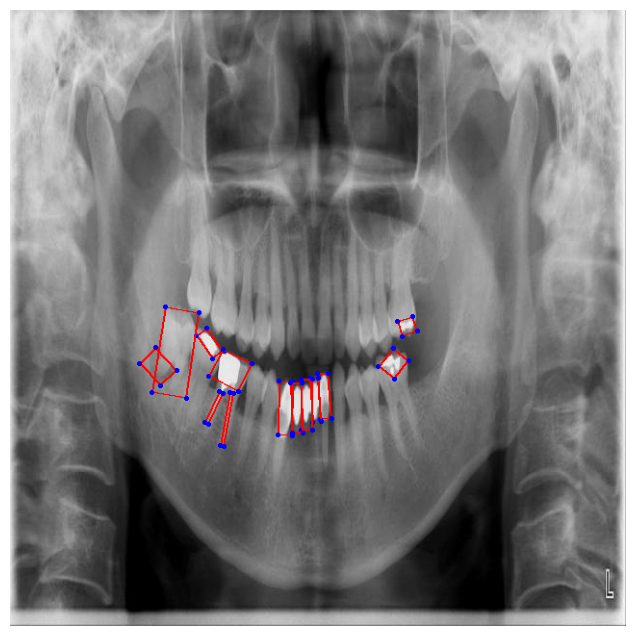

In [58]:
# Paths
image_dir = path+"/YOLO/YOLO/train/images"
label_dir = path+"/YOLO/YOLO/train/labels"

# Pick one image to test
for file in os.listdir(image_dir):
    if file.endswith(".jpg") or file.endswith(".png"):
        img_path = os.path.join(image_dir, file)
        label_path = os.path.join(label_dir, os.path.splitext(file)[0] + ".txt")
        break  # just take first one

# Open image
img = Image.open(img_path)
width, height = img.size

# Read polygons from its label
if os.path.exists(label_path):
    polygons = read_yolo_polygon(label_path, width, height)
else:
    polygons = []

# Draw polygons
draw = ImageDraw.Draw(img)
for class_id, points in polygons:
    draw.polygon(points, outline="red", width=2)
    for x, y in points:
        draw.ellipse((x-2, y-2, x+2, y+2), fill="blue")

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.show()